<div style="border:solid green 2px; padding: 20px">
    
<b>Акбар, gривет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#сохраняем датафрейм в переменную data

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
        

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Кажется, работа над проектом велась локально и пути к файлам не были изменены на общедоступные. Стоит переписать код таким образом, что бы он запускался и в jupiter hub, и локально без внесения дополнительных правок. Этого можно добиться многими способами. Например, использовать конструкцию try-except для путей файлов: try - пути на локальном компьютере, except - пути на сервере.
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, старайся, пожалуйста, придерживаться этой стратегии в дальнейших проектах =)
</div>

In [3]:
#выводим первые 10 строк датафрейма

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#изучим информацию 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

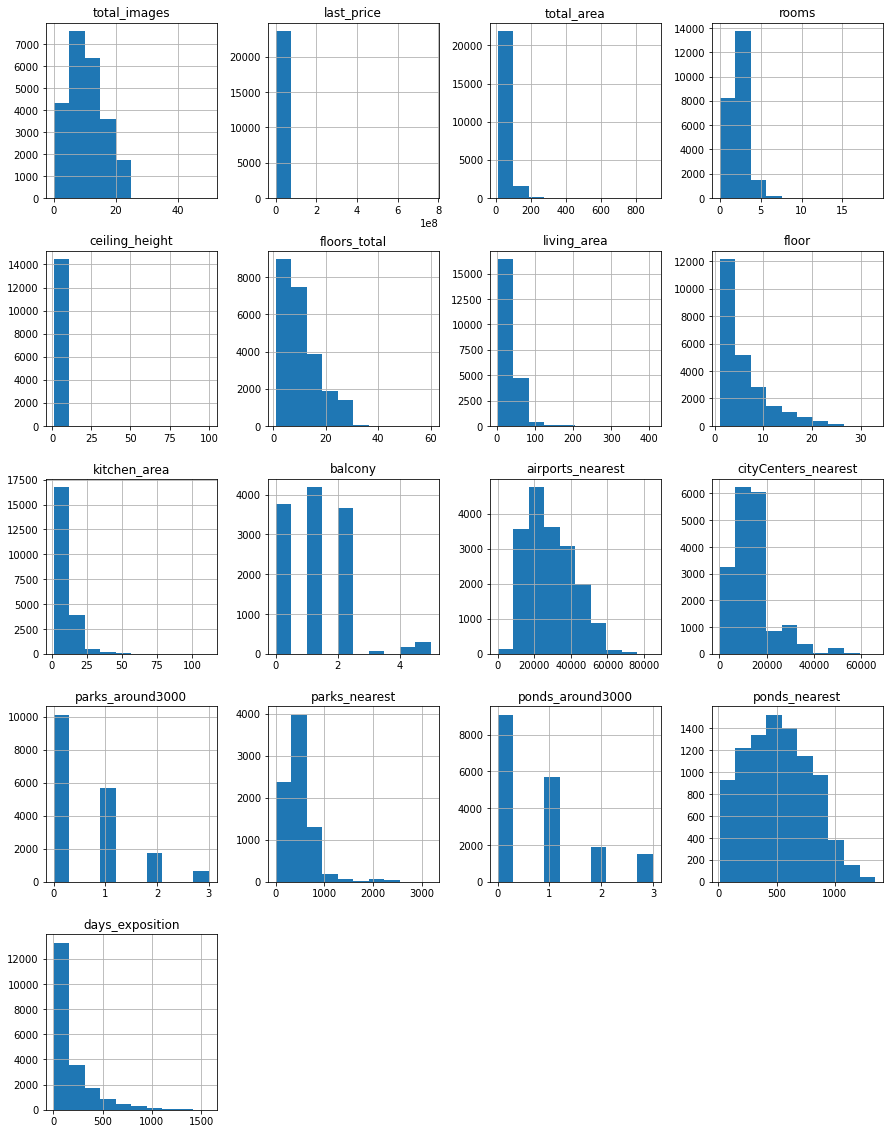

In [5]:
data.hist(figsize=(15, 20))
plt.show();

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку `matplotlib.pyplot as plt`
2. В конец кода добавить `;`
    
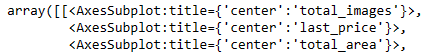
</div>

In [6]:
#Изучим файл

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#изучим, есть ли в датафрейме повторяющиеся строки
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на явные дубликаты - основа предобработки данных

<H3> Вывод </H3>

* Наш датафрейм состоит из 22 столбец и 23699 строк.
* Имеется много пропусков в таких столбцах, площадь кухни, балкона, высота потолка, кол-во этажей в доме, ближжаейжее расположение парков, водоемов и другие. 
* повторяющиеся строки не найдены 


<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть.

### Выполните предобработку данных

In [8]:
#cделаем нужный формат времени. Столбец first_day_exposition переведем в формат datetime


data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition']


0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [9]:
#переведем названия городов и поселков в нижний регистр

data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].head(5)

0    санкт-петербург
1     посёлок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object

In [10]:
#находим кол-во пропущенных значений

data.isna().sum()
#pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

А для чего их заменять на `''`? Какой смысл? Если пропуски ничем адекватным не заменить - то их лучше оставить

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

data['floors_total'] = data['floors_total'].fillna(0).astype(int)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__
Если в столбце балконов пропуск - логично предположить, что балкона просто нет. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Да, теперь корректно

In [12]:
#заполняем высоту потолков медианным значением 

median = data['ceiling_height'].median()

data['ceiling_height'] = data['ceiling_height'].fillna(median)

In [13]:
#если недвижимость не является апартаментами, то делаем вставляем False

data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
#проверяем кол-во пропущнных значений

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
#переведем столбцы в числовой тип, чтобы можно было с ними проводить математические операции 

obj_to_numeric = ['kitchen_area', 'floors_total', 'living_area', 'balcony', 'airports_nearest',
'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 
'ponds_nearest', 'days_exposition']


for obj in obj_to_numeric:
    data[obj] = pd.to_numeric(data[obj])

In [16]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не все столбцы имеют корректный тип данных. Например `balcony` имеет дробный тип. Но ведь не может быть 1.5 балкона в доме. Как думаешь?
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно

В данных встречаются неявные дубликаты, такие как «поселок» - «посёлок», «городской посёлок» - «посёлок городского типа»,
«садовое товарищество» - «садоводческое некоммерческое товарищество, «посёлок станции» - «посёлок при железнодорожной станции»
Заменим их на правильные названия

In [18]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('городской посёлок', 'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].replace('садовое товарищество', 'садоводческое некоммерческое товарищество', regex=True)
data['locality_name'] = data['locality_name'].replace('посёлок станции', 'поселок при железнодорожной станции', regex=True)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Оставлю общий комментарий по проекту: давай все ходы действий и выводы перенесем в обычную ячейку markdown? Комментировать стоит лишь сам код
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
    
</div>

In [19]:
#посмотрим, есть ли квартиры без комнат которые не являются студийными. Если таковы есть, от них следует избавиться
data.query('rooms == 0 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,2.65,14,17.0,1,False,...,NaN,0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26,24.3,19,False,...,NaN,1,поселок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,2.65,18,NaN,8,False,...,NaN,1,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.0,3,False,...,NaN,1,поселок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,2.65,27,18.0,7,False,...,NaN,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,2.65,18,15.0,16,False,...,NaN,1,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,2.65,4,10.5,3,False,...,NaN,1,поселок станции корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,2.65,18,18.7,9,False,...,NaN,2,санкт-петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,2.65,10,18.0,6,False,...,NaN,2,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,2.65,25,18.0,4,False,...,NaN,2,санкт-петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [20]:
data.drop(data.query('rooms == 0 and studio == False').index, inplace=True)

In [21]:
#есть ли столбцы, где площадь кухни больше самой недвижимости. Если есть, от них стоит избавиться

data.query('kitchen_area > living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8,38.00,4,False,...,50.00,0,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
53,7,4300000.0,39.10,2017-11-10,1,2.65,25,15.40,13,False,...,15.50,2,поселок парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
101,4,3000000.0,37.00,2019-03-23,1,2.75,10,12.00,3,False,...,13.00,0,садоводческое некоммерческое товарищество нова...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23388,7,5400000.0,43.00,2017-04-24,1,2.65,18,12.00,8,False,...,20.00,0,санкт-петербург,25108.0,15940.0,0.0,NaN,0.0,NaN,124.0
23481,1,3000000.0,37.29,2019-04-15,1,2.65,19,10.08,10,False,...,16.88,0,санкт-петербург,37006.0,15157.0,0.0,NaN,0.0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20,1,3.60,12,13.59,12,False,...,17.87,2,санкт-петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24,3,3.00,8,3.00,8,False,...,16.00,1,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


In [22]:
#таких строк оказалось 355, от них стоит избавиться
data.drop(data.query('kitchen_area > living_area').index, inplace=True)

In [23]:
#находим уникальные значения высоты потолка 
sorted(data['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,


In [24]:
#будем считать, что потолки 10 метров и выше были завышены на 1 десяток, поэтому разделим их 10

selected_rows  = data.loc[data['ceiling_height'] > 10]
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = selected_rows['ceiling_height'] / 10

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Молодец, что не хардкодишь. А используешь условие

In [25]:
#удалим потолки ниже 2-х и выше 6-ти метров
data.drop(data[data['ceiling_height'] < 2].index, inplace=True)
data.drop(data[data['ceiling_height'] > 6].index, inplace=True)

<H3> Вывод </H3>

* Перевели столбец first_day_exposition в тип данных datetime
* Привели к нижнему регистру столбец с названием поселков - locality_name
* Пустые значения в заменили на 0
* В столбце is_apartment - добавили значение False
* В locality_name убраны неявные дубликаты, исправлены разночтения населенных пунктов
* ceiling_height — высота потолков была скорректирована, теперь данные находятся в диапазоне от 2 до 6 метров

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Молодец, что приводишь выводы по разделам

### Добавьте в таблицу новые столбцы

In [26]:
#добавим цену за 1 квадратный метр
data['price_per_square'] = round(data['last_price'] / data['total_area'])

In [27]:
#добавим день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

In [28]:
#добавим месяц публикации объявления 
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [29]:
#добавим год публикации объявления 
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Совет на будущие работы `(в этом проекте этот метод не нужен)`: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
     https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
    
    и
    
    https://www.sharpsightlabs.com/blog/pandas-astype/
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [30]:
#добавим тип этажа квартиры (значения — «первый», «последний», «другой»);
data.loc[data['floor'] == 1, 'type_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'последний'
data.loc[data['type_floor'].isna(), 'type_floor'] = 'другой'

sorted(data['type_floor'].unique())

['другой', 'первый', 'последний']

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Хорошо бы проверить функцию, вывев уникальные значения нового столбца

In [31]:
#добавим расстояние до центра города в километрах.
data['distance_to_center_km'] =  round(data['cityCenters_nearest'] / 1000, 1)   

In [32]:
#проверим, корректно ли отображаются новые столбцы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,publication_day,publication_month,publication_year,type_floor,distance_to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,18.6
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,13.9
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,6.8
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой,NaN


<H3> Вывод </H3>

В таблицу добавлены новые параметры:
 * цена одного квадратного метра
 * день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
 * месяц публикации объявления
 * год публикации объявления
 * тип этажа квартиры (значения — «первый», «последний», «другой»)
 * расстояние до центра города в километрах

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

Изучены и описаны параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.


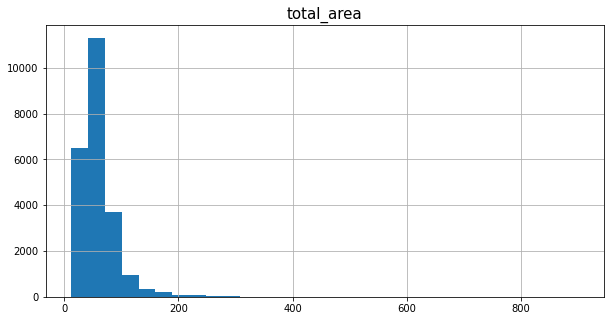

count    23275.000000
mean        60.422440
std         35.687877
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


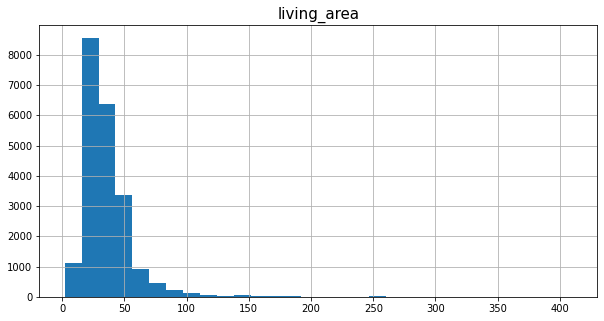

count    21376.000000
mean        34.762839
std         22.097340
min          2.000000
25%         18.922500
50%         30.100000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64


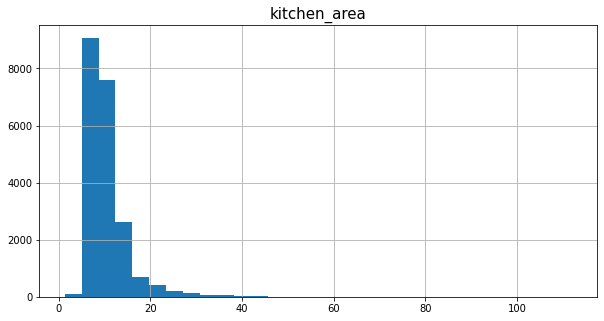

count    21058.000000
mean        10.314853
std          5.335908
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64


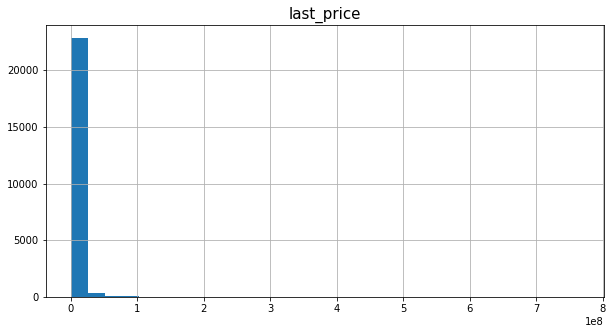

count    2.327500e+04
mean     6.498207e+06
std      1.083772e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64


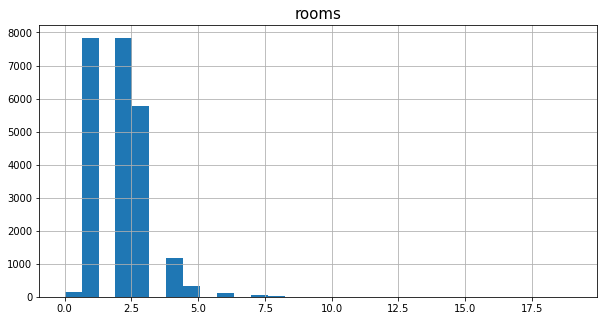

count    23275.000000
mean         2.085328
std          1.077206
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


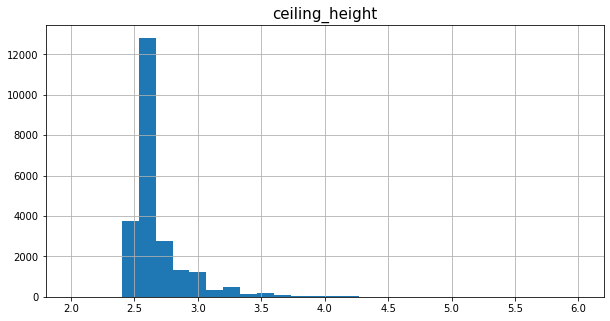

count    23275.000000
mean         2.695681
std          0.220730
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


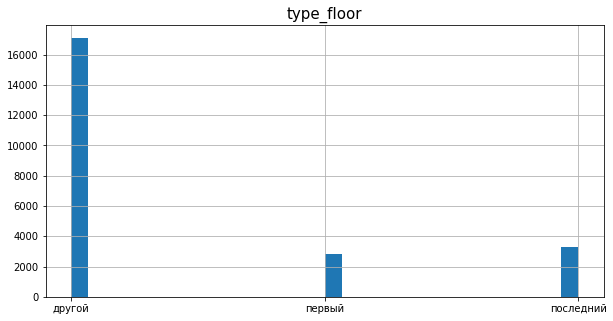

count      23275
unique         3
top       другой
freq       17097
Name: type_floor, dtype: object


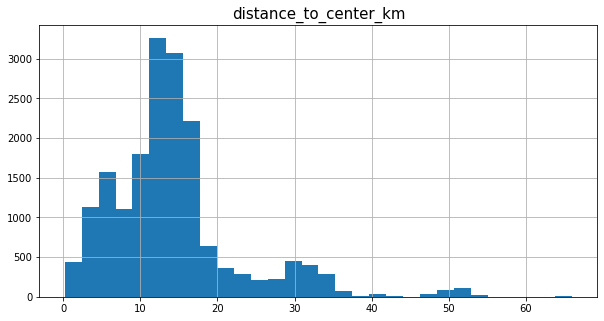

count    17854.000000
mean        14.228957
std          8.628346
min          0.200000
25%          9.300000
50%         13.100000
75%         16.300000
max         66.000000
Name: distance_to_center_km, dtype: float64


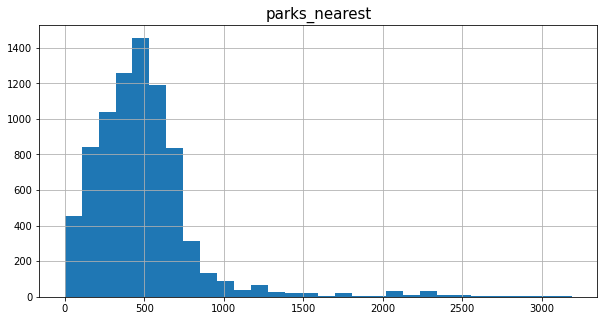

count    7928.000000
mean      490.379289
std       340.101422
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


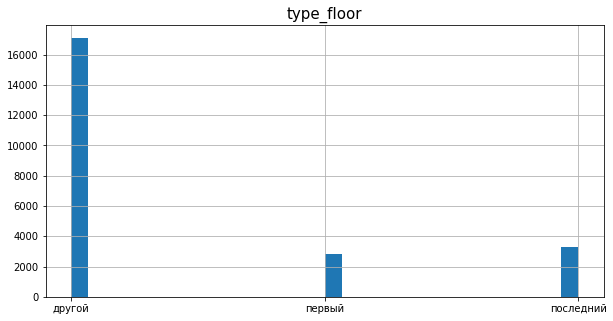

count      23275
unique         3
top       другой
freq       17097
Name: type_floor, dtype: object


In [33]:
for columns in data[['total_area','living_area', 'kitchen_area', 'last_price', 'rooms' ,'ceiling_height', 'type_floor',
                    'distance_to_center_km', 'parks_nearest', 'type_floor']]:
    range_max = data[columns].max()
    range_min = data[columns].min()
    data[columns].hist(bins=30, range=(range_min, range_max), figsize=(10,5))
    plt.title(columns, fontsize=15)
    plt.show()
    print(data[columns].describe())

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует гистограмма по типу этажа. Добавь, пожалуйста

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Полученные данные соответствуют реалиям
</div>

### Вывод
Больше всего встречаются 2-комнатные квартиры с площадьб 50-60 квадратных метров, с высотой потолка 2.65 метра и площадью кухни около 10 кв. метров
Средняя цена на недвижиость около 4.6 млн рублей.
Среднее расположение до центра города составляет 13 км. 
В среднем близжайший парк находится на расстояние около 450 метров.




count    20145.000000
mean       180.991660
std        219.932613
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

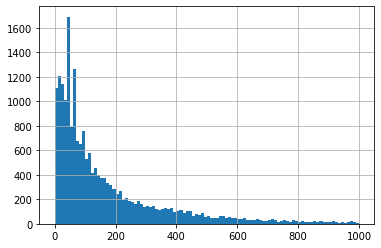

In [34]:
data['days_exposition'].hist(bins=100, range=(0, 1000))

data['days_exposition'].describe()

Средняя продажа составляет 95 дней, ну а минимальная 1 день, то есть квартира была продана в день выставления на продажу.
Самая затянувшаяся продажа составляет 1580 дней или же чуть больше 5 лет. 

In [35]:
#Разобьем на 4 части, где у нас будет ровные доли продаж (быстрые, средние, долгие, затянувшиеся)
data['days_exposition'].quantile([0.25, 0.5, 0.8])

0.25     45.0
0.50     95.0
0.80    287.0
Name: days_exposition, dtype: float64

Можем сделать вывод:
* продажи которые заверишилась за 45 дней (полутра месяца) считаются быстрыми
* от 45 до 95 дней (2-3 месяца) - средними, 
* от 95 дней до 290 дней (4-10 месяцев) - долгими
* oт 290 дней (10 месяцев) и более - затянувшиеся

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, до 1.5 месяцев можно назвать быстрой продажей

0.652438174952199

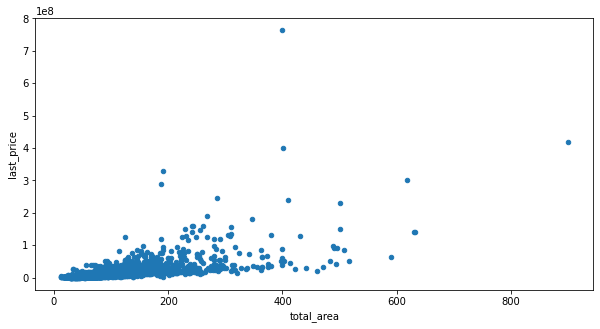

In [36]:
data.plot(y='last_price',x='total_area', kind='scatter', figsize=(10, 5))
data['last_price'].corr(data['total_area'])

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость нелинейных данных рассматриваешь через тип графика scatter
</div>

<div class="alert alert-block alert-info">
    Корреляция заметна. Тем больше площадь квартиры - тем он дороже     
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

0.5751223680952822

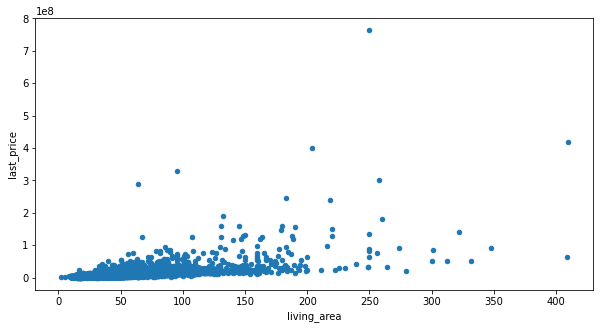

In [37]:
data.plot(y='last_price',x='living_area', kind='scatter', figsize=(10, 5))
data['last_price'].corr(data['living_area'])

<div class="alert alert-block alert-info">
    Конечно же жилая площадь поддается той же логике. Чем больше - тем дороже     
</div>

0.5305119519610985

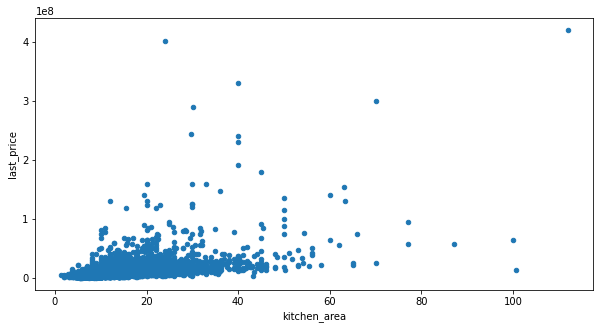

In [38]:
data.plot(y='last_price',x='kitchen_area', kind='scatter', figsize=(10, 5))
data['last_price'].corr(data['kitchen_area'])

<div class="alert alert-block alert-info">
    Дела у кухонь такие же, ведь тем больше квартира - тем больше у кухоня. Соответсвенно выше и цена     
</div>

0.3670716858863202

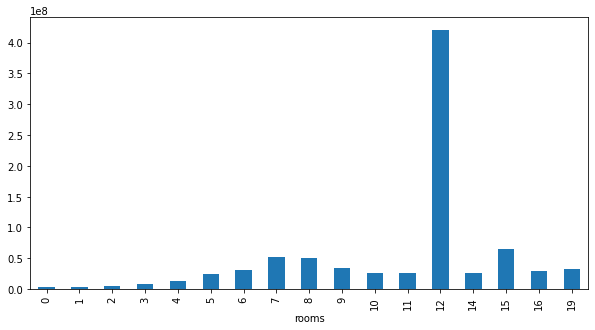

In [39]:
data.groupby('rooms')['last_price'].mean().plot(kind='bar', figsize=(10, 5))
data['last_price'].corr(data['rooms'])

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Зависимости дискретных данных (тип этажа, месяц, комнаты) лучше рассмотреть на линейной или столбчатой диаграмме (сгруппировав предварительно)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно

<div class="alert alert-block alert-info">
    Корреляция между количеством хоть и не очень сильная, но все же есть. Значит, тем больше комнат - тем выже цена
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Корреляцию есть смысл рассчитывать только для нелинейных данных (в нашем случае это площади)
</div>

<AxesSubplot:xlabel='type_floor'>

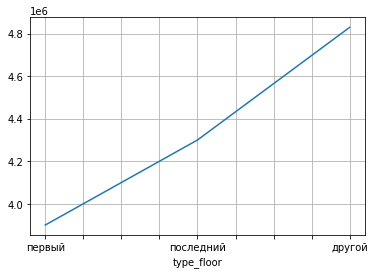

In [40]:
#data.plot(y='last_price',x='type_floor', kind='scatter', figsize=(10, 5))


(data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc= 'median')
.sort_values(by='last_price')
.plot(legend=False, grid=True))


<div class="alert alert-block alert-info">
Квартиры на первом этаже дешевле всего, затем идут квартиры на последнем этаже, потом идут другие, которые являются более дорогими
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

0.0023466415233290273

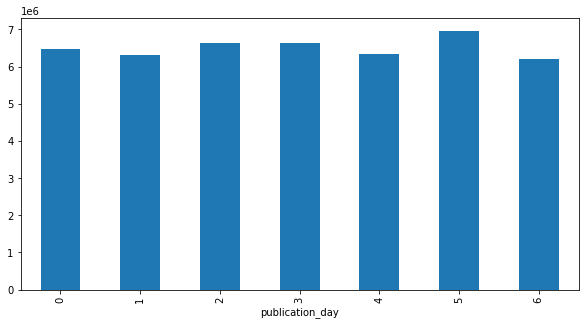

In [41]:
data.groupby('publication_day')['last_price'].mean().plot(kind='bar', figsize=(10, 5))
data['last_price'].corr(data['publication_day'])

0.00547488956983039

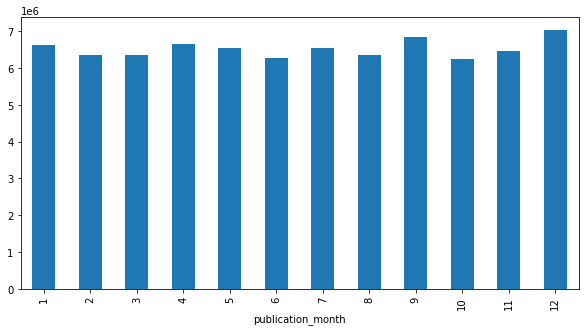

In [42]:
data.groupby('publication_month')['last_price'].mean().plot(kind='bar', figsize=(10, 5))
data['last_price'].corr(data['publication_month'])

-0.0434247946275187

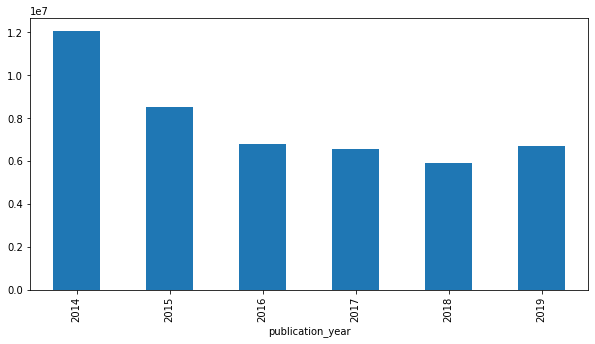

In [43]:
data.groupby('publication_year')['last_price'].mean().plot(kind='bar', figsize=(10, 5))
data['last_price'].corr(data['publication_year'])

<div class="alert alert-block alert-info">
Корреляция между ценой и днем недели, месяцем и годом размещения фактически отсутстует
</div>

In [44]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»

top_10 = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean'])
top_10.columns = ('count', 'mean')
top_10.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,15433,114091.190695
поселок мурино,534,85337.464419
поселок шушары,431,78377.624130
всеволожск,395,68553.637975
пушкин,362,102905.941989
колпино,338,75424.571006
поселок парголово,310,89794.548387
гатчина,305,68683.580328
деревня кудрово,275,92385.600000


<div class="alert alert-block alert-info">
Самый дорогой квадратный метр в городе Санкт-петербурге - 114091 рублей за квадратный метр, самый дешевый из этой десятки в городе Выборге - 58141 рублей </div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

Узнаем, как меняется цена квартиры в зависимости от ее отдаленности

In [45]:
spb = data.query('locality_name == "санкт-петербург"')

spb['distance_to_center_km'] = (spb['cityCenters_nearest'] / 1000).round()

spb['price_for_kilometer'] = spb['last_price'] / spb['distance_to_center_km']

spb.pivot_table(index='distance_to_center_km', values='price_for_kilometer')

/tmp/ipykernel_605/784958019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['distance_to_center_km'] = (spb['cityCenters_nearest'] / 1000).round()
/tmp/ipykernel_605/784958019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['price_for_kilometer'] = spb['last_price'] / spb['distance_to_center_km']


,price_for_kilometer
distance_to_center_km,
0.0,inf
1.0,2.141032e+07
2.0,8.971668e+06
3.0,3.698006e+06
4.0,3.323488e+06
5.0,2.896030e+06
6.0,2.474071e+06
7.0,2.069909e+06
8.0,1.236095e+06


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub Kernel и Restart & Run All 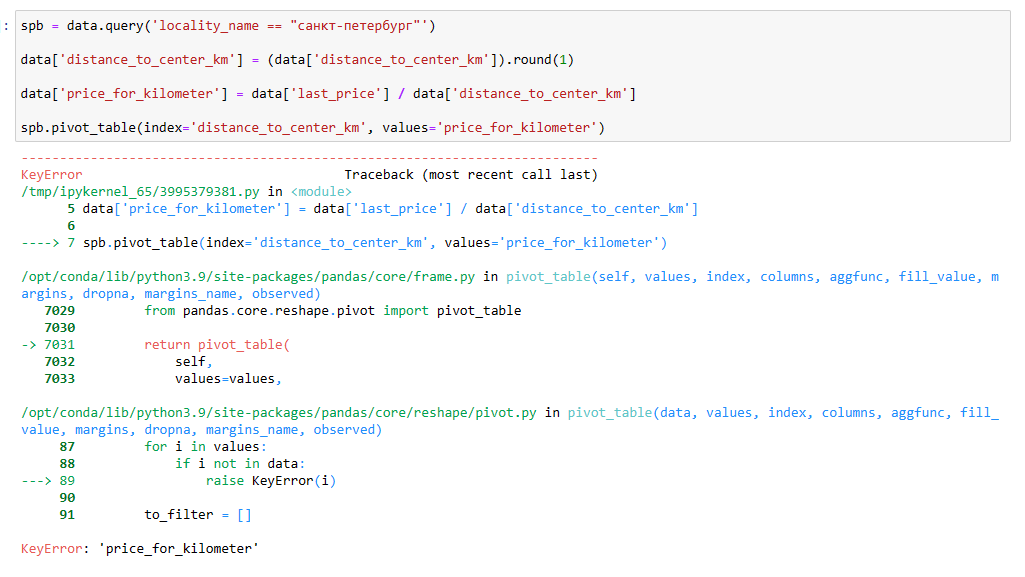

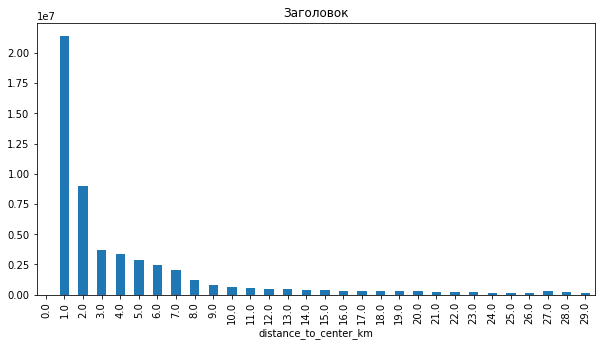

In [47]:
spb.groupby('distance_to_center_km')['price_for_kilometer'].mean().plot(kind='bar', figsize=(10, 5), title = 'Заголовок')
plt.show()

<div class="alert alert-block alert-info">
По графику видно, что цена обрывается на 6-7 километрах. Следовательно центром является радиус 6-7 км. 
Также видно, как меняется цена взависимости от расстояния от центра, чем дальше от центра, тем дешевле квартира
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

### Напишите общий вывод

Проанализировав датафрейм из 22 столбец и 23699 строк было обнаружено много пропусков, которые были заменены на медианные значения, там где это можно было сделать.

Все строки уникальные, повторяющихся не было выявлено.

Пропуски столбца is_apartment заменили на False, так как эта строка скорее всего это является квартирой. 

В столбце locality_name были заменены неявные дубликаты.

Были оставлены значения потолков от 2 до 6 метров, так как значения ниже и выше считаются аномальными.


В таблицу были добавлены новые значения как: цена одного квадратного метра, день публикации объявления, месяц публикации и год, а так же тип этажа квартиры и расстояние до центра города в километрах.


Среднестатистическая модель квартиры представляет из себя следующий образ:
* Кол-во комнат: 2
* Площадь: 55 кв. метров
* Площадь кухни: 10 кв. метров
* Высота потолков: 2.65 метра
* Ср. расположение до центра: 13 км
* Ср. расстояние до ближайшего парка: 450 метров 
* Cтоимость: 4.6 млн рублей
* Ср. время продажи: 3 месяца


Также были заметны явные связи между ценой квартиры и ее площадью, площадью кухни, кол-вом комнат. Квартиры с большой площадью и кол-вом комнат как правило дороже.

Также мы узнали, что квартиры на последнем этаже дешевле других, а квартиры на 1-ых этажах самые дешевые.

Корреляции между стоимостью квартиры и днем/месяцем/годом публикации никакой нет. Эти показатели никак не влияют на стоимость квартиры.

Самый дорогой кв. метр за квартиру занимает Санкт-Петербург со средней ценой 114091 рублей за кв. метр. Также было выявлено, что тем ближе квартира находится к центру Санкт-Петербурга, тем она дороже. Этот показатель заметно снижается после 5 км отдаленности от центра города.

Продолжительность продаж поделили на 4 категории:
* продажи которые заверишилась за 45 дней (полутра месяца) считаются быстрыми
* от 45 до 95 дней (2-3 месяца) - средними,
* от 95 дней до 290 дней (4-10 месяцев) - долгими
* oт 290 дней (10 месяцев) и более - затянувшиеся



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Выгрузка данных

2) Замена пропусков

3) Типы данных

4) Оформление проекта

5) Шаг 4.1 (тип этажа)

6) Поправить графики scatter

7) Падает код

8) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [X]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.